In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('lab3data.csv')

time = np.array(data['t'])
y_displacement = np.array(data['y'])
y_velocity = np.array(data['vy'])

# y = (-1/2 * g) * t^2 + y_0
# y = m * x + b

displacement_fitpar, displacement_uncertainty = np.polyfit(time, y_displacement, 2, cov=True)
a2 = displacement_fitpar[0]
a1 = displacement_fitpar[1]
a0 = displacement_fitpar[2]

a2_uncertainty = np.sqrt(displacement_uncertainty[0, 0])
a1_uncertainty = np.sqrt(displacement_uncertainty[1, 1])

g_1 = -2 * a2
g_1_uncertainty = np.abs(-2 * a2_uncertainty) 
print(f"The value of g = {g_1:.2f} m/s^2 +/- {g_1_uncertainty:.2f} m/s^2")

v_0 = a1
v_0_uncertainty = a1_uncertainty
print(f"The value of v_0 = {v_0:.2f} m/s +/- {v_0_uncertainty:.2f} m/s")

# y = -a * t + b
# y = m * x + b

velocity_fitpar, velocity_uncertainty = np.polyfit(time[1:-1], y_velocity[1:-1], 1, cov=True)
b1 = velocity_fitpar[0]
b2 = velocity_fitpar[1]

b1_uncertainty = np.sqrt(velocity_uncertainty[0, 0])
b2_uncertainty = np.sqrt(velocity_uncertainty[1, 1])

g_2 = -b1
g_2_uncertainty = b1_uncertainty
print(f"The value of g = {g_2:.2f} +/- {g_2_uncertainty:.2f} m/s^2")
print(f"The value of v_0 = {b2:.3f} m/s +/- {b2_uncertainty:.3f}")

The value of g = 9.83 m/s^2 +/- 0.18 m/s^2
The value of v_0 = -0.91 m/s +/- 0.04 m/s
The value of g = 9.65 +/- 0.45 m/s^2
The value of v_0 = -0.926 m/s +/- 0.102


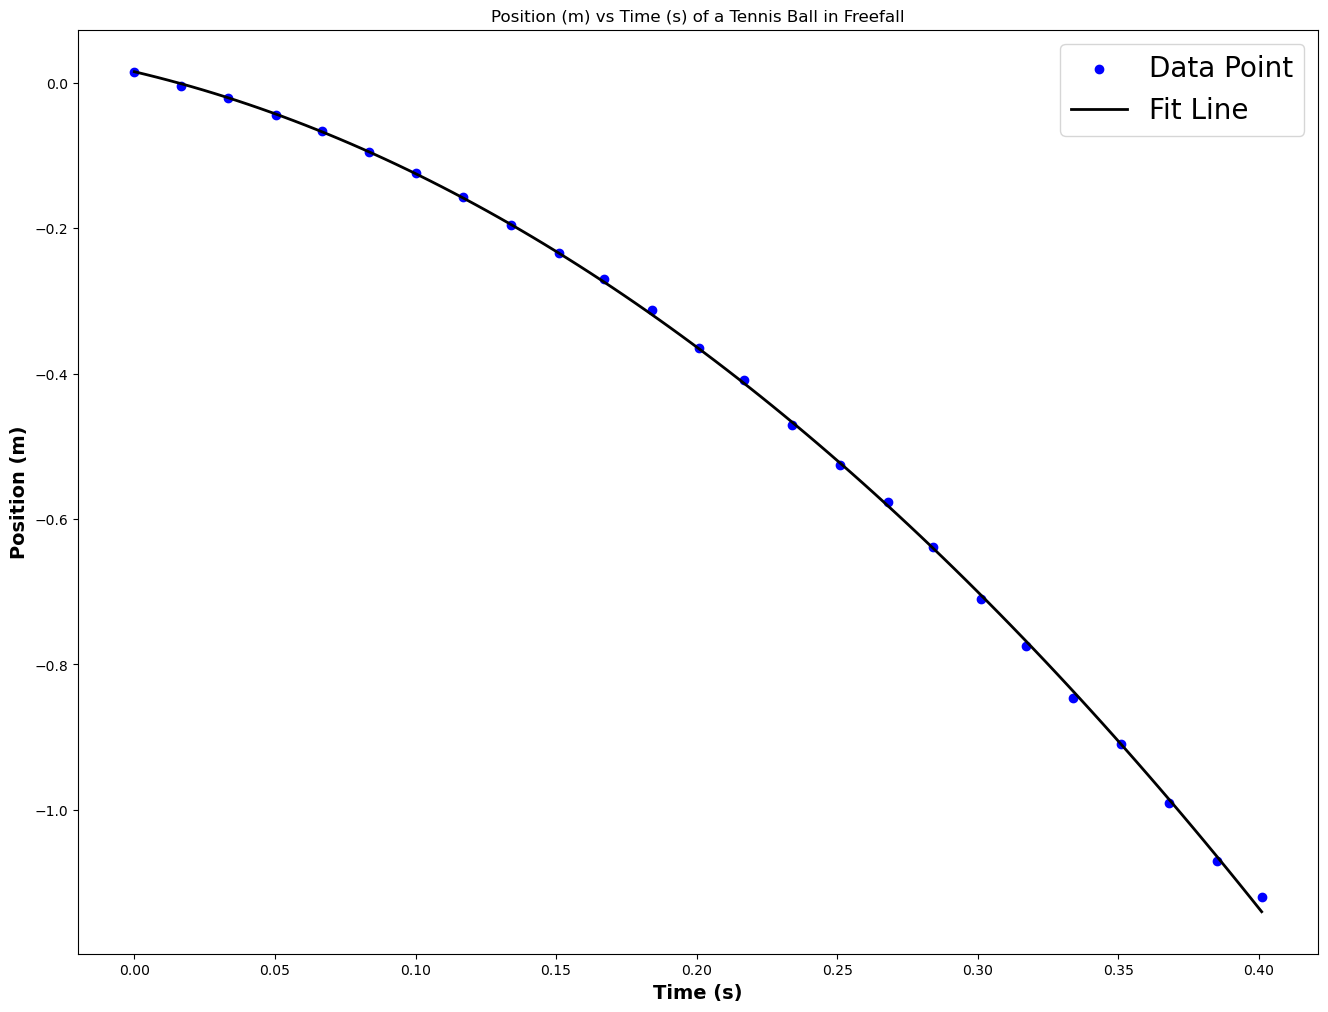

In [20]:
created_time = np.linspace(time[0], time[-1], 100)
created_y_displacement = a2 * (created_time**2) + a1 * created_time + a0

plt.figure(figsize=(16,12))

plt.scatter(time, y_displacement, marker="o", linewidths=1, color="blue", label="Data Point")
plt.plot(created_time, created_y_displacement, linestyle="-", linewidth=2, color="black", label="Fit Line")

plt.title("Position (m) vs Time (s) of a Tennis Ball in Freefall")
plt.xlabel("Time (s)", fontsize=14, weight="bold")
plt.ylabel("Position (m)", fontsize=14, weight="bold")

plt.legend(loc='best', prop={'size': 20})

plt.show()

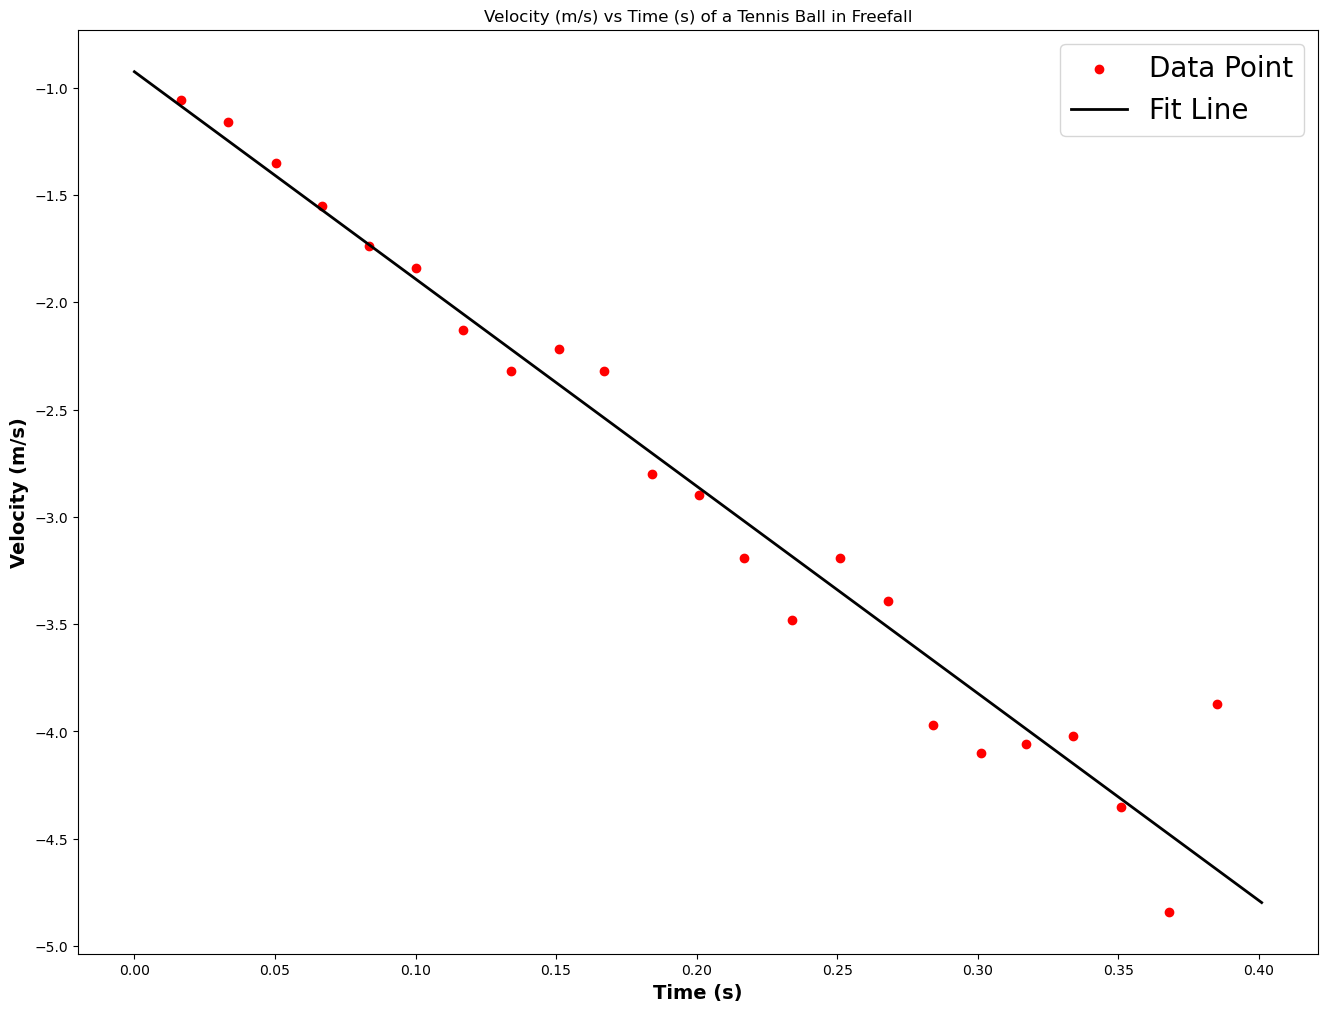

In [21]:
fitpar, uncertainty = np.polyfit(time[1:-1], y_velocity[1:-1], 1, cov=True)

g = fitpar[0]
v_0 = fitpar[1]

created_y_velocity = g * created_time + v_0

plt.figure(figsize=(16,12))

plt.scatter(time, y_velocity, marker="o", linewidths=1, color="red", label="Data Point")
plt.plot(created_time, created_y_velocity, linestyle="-", linewidth=2, color="black", label="Fit Line")

plt.title("Velocity (m/s) vs Time (s) of a Tennis Ball in Freefall")
plt.xlabel("Time (s)", fontsize=14, weight="bold")
plt.ylabel("Velocity (m/s)", fontsize=14, weight="bold")


plt.legend(loc='best', prop={'size': 20})

plt.show()